# 회귀Regression

1. (다중) 선형Linear 회귀(최소제곱법) 
    - 선 하나로 뭉뚱그리는 게 부정확해 보일 수 있지만,다차원 데이터 일 수록(식2갠데 변수 6개) 꽤 좋은 선택지

2. 릿지Ridge 회귀
    - 규제Regularization 중, L2
        - 과대적합 방지. 가중치를 작게작게
        - 차원 축소가 일어나지 않음
    - 매개변수 alpha
        - 값이 높을 수록 많이 단순해진다. 기본값 1
        - 10쯤 넣으면 계수가 0에 가까워짐. 0이 되진 않음
        - 단순해지면? 당장 모델(훈련)점수는 별로겠지만, 일반화에는 좋음
        - 0.1 넣으면 산개되고_데이터 생김새에 가깝게. 요러면 선형회귀랑 거의 비슷
        - 보통 10까지 넣음
    - 제일 많이 씀

3. 라쏘
    - 규제 중, L1
    - 가중치가 0까지 감. 해당 변수를 아예 제거하는 셈 ㅇㅇ

### 3개 한방에?
그냥 릿지 alpha값을 0.01~100 까지 돌리면 다 해보는 거 아님??
> 아님 ㅇㅇ

#### 모델 검증_예측일 때
모델 재료말고 다른걸로 테스트한 점수가 높은 게 좋은 것

##### 문제의식: 보스턴 data에
설명변수가 너무 많아서 KNN regression으로는 안 되었다. 선형회귀는 어떨까?

## 선형 회귀
LinearRegression()

### 단순 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression

In [29]:
import mglearn
from sklearn.model_selection import train_test_split

In [30]:
X,y= mglearn.datasets.make_wave(n_samples=50)

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

In [32]:
lr= LinearRegression().fit(X_train, y_train)

#### 결과확인
점수(결정계수)자체가 낮으니 좋은 모델은 아님. 다만, 값이 비슷하이 과대적합은 아님

In [33]:
lr.coef_

array([0.40640007])

In [34]:
lr.intercept_

-0.014705169783905986

In [35]:
print("훈련세트 점수: {:.5f}".format(lr.score(X_train, y_train)))
print("새로온 테스트: {:.5f}".format(lr.score(X_test, y_test)))

훈련세트 점수: 0.60140
새로온 테스트: 0.56752


### 다중 선형회귀

In [ ]:
X,y= mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)

In [39]:
lr= LinearRegression().fit(X_train, y_train)

In [40]:
print(X.shape, y.shape,'\n',X_train.shape, y_train.shape,'\n',  X_test.shape,y_test.shape)

(506, 104) (506,) 
 (379, 104) (379,) 
 (127, 104) (127,)


##### 점수확인
훈련점수만 너무 높고, 새로온 건 별로. 과대적합 ㅇㅇ

In [44]:
print("훈련 점수: %8.5f"%lr.score(X_train, y_train))
print("새로온 거: %8.5f"%lr.score(X_test, y_test))

훈련 점수:  0.95235
새로온 거:  0.60578


## 릿지 Ridge 회귀
과대적합이 줄고, 새로온거 점수가 좋아졌다.
> Boston() data에 대해선, 선형회귀보다 릿지가 좋다

In [45]:
from sklearn.linear_model import Ridge

In [47]:
X,y= mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)

In [48]:
ridge= Ridge().fit(X_train, y_train)

In [51]:
print("훈련 점수: %8.5f"%ridge.score(X_train, y_train))
print("새로온 거: %8.5f"%ridge.score(X_test, y_test))

훈련 점수:  0.88606
새로온 거:  0.75271


#### 그치만 0.75점이 높은 건 아니므로, alpha값 조정
1. alpha=10: 과대적합은 줄었지만, 새로온거 점수가 더 낮아졌다 ;;
2. alpha=0.1:과대적합이 폭발!! 새로온거 점수는 기본값 1보단 높아짐

In [50]:
ridge10= Ridge(alpha=10).fit(X_train, y_train)

In [52]:
print("훈련 점수:%8.5f"%ridge10.score(X_train,y_train))
print("새로온 거:%8.5f"%ridge10.score(X_test,y_test))

훈련 점수: 0.78835
새로온 거: 0.63590


In [53]:
ridge01= Ridge(alpha=.1).fit(X_train, y_train)

In [55]:
print("훈련 점수:%8.5f"%ridge01.score(X_train,y_train))
print("새로온 거:%8.5f"%ridge01.score(X_test,y_test))

훈련 점수: 0.92858
새로온 거: 0.77179


#### 그래프: 각 alpha값에 따라 릿지 회귀계수 비교
1. Ridge alpha 10: 거의 0
2. Ridge alpha 1: 조금 산개. 조금 복잡
3. Ridge alpha 0.1: 좀더 산개. 좀더 복잡
4. Linear Regression: 완전 산개. 제일 복잡

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
plt.rc('font', family='Malgun Gothic')

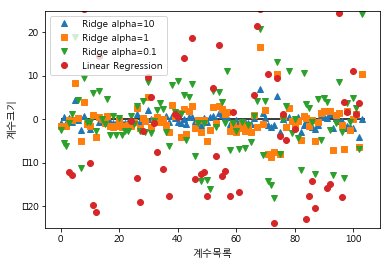

In [61]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="Linear Regression")

plt.xlabel('계수목록')
plt.ylabel('계수크기')
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

## 라쏘 Lasso

In [68]:
from sklearn.linear_model import Lasso
import numpy as np

In [63]:
X,y= mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)

In [74]:
print(X_train.shape,  y_train.shape, '\n',X_test.shape, y_test.shape)

(379, 104) (379,) 
 (127, 104) (127,)


#### alpha값 변화에 따른 점수
1. 1 기본값: 점수가 ㅆㄺ같이 나왔다. 104개 중에 특성(칼럼) 4개는 너무 적음(복잡도가 너무 낮다)
2. 0.01: 점수가 크게 오름! 다만 훈련점수 대비 새로온거 점수가 낮다. 과적합
3. 0.0001: 훈련점수는 더욱 과적합되었고, 새로온거 점수는 더 낮아졌다

In [79]:
lasso= Lasso().fit(X_train, y_train)

In [80]:
print("훈련 점수:%8.5f"%lasso.score(X_train,y_train))
print("새로온 거:%8.5f"%lasso.score(X_test,y_test))

print("사용한특성 수:%4d"%np.sum(lasso.coef_ != 0))

훈련 점수: 0.29324
새로온 거: 0.20938
사용한특성 수:   4


> ? max_iter가 뭐하는 값인지?

In [85]:
#Objective did not converge. You might want to increase the number of iterations.
# Fitting data with very small alpha may cause precision problems. ConvergenceWarning)
# lasso001= Lasso(alpha=0.01).fit(X_train, y_train)
lasso01= Lasso(alpha=.01, max_iter=100000).fit(X_train, y_train)

In [86]:
print("훈련 점수:%8.5f"%lasso01.score(X_train,y_train))
print("새로온 거:%8.5f"%lasso01.score(X_test,y_test))

print("사용한특성 수:%4d"%np.sum(lasso01.coef_ != 0))

훈련 점수: 0.89651
새로온 거: 0.76565
사용한특성 수:  33


In [87]:
lasso0001= Lasso(alpha=.0001, max_iter=100000).fit(X_train, y_train)

In [88]:
print("훈련 점수:%8.5f"%lasso0001.score(X_train,y_train))
print("새로온 거:%8.5f"%lasso0001.score(X_test,y_test))

print("사용한특성 수:%4d"%np.sum(lasso0001.coef_ != 0))

훈련 점수: 0.95106
새로온 거: 0.64031
사용한특성 수:  94


Lasso alpha값이 낮아질수록 Linear Regression에 가까워지고 있다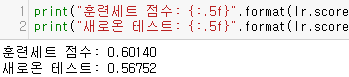

### Lasso: alpha값에 따른 비교
1. Lasso alpha값이 0에 가까울수록, 산개(복잡도가 높음. 각 데이터를 따라감)

Text(0,0.5,'계수 크기')

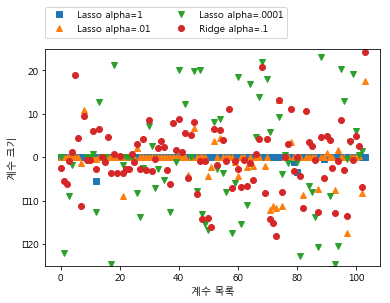

In [96]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso01.coef_, '^', label='Lasso alpha=.01')
plt.plot(lasso0001.coef_, 'v', label='Lasso alpha=.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=.1')

plt.legend(ncol=2, loc= (0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')

In [101]:
# !jupyter nbconvert --to script 회귀Regression.ipynb
# !start .

### alpha값을 한번에 여럿 보자
이왕이면 함수화

### 재료

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [103]:
import numpy as np
import mglearn
from sklearn.model_selection import train_test_split

In [ ]:
# X= mglearn.datasets.load_boston().data
# y= mglearn.datasets.load_boston().target

In [104]:
X,y= mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)

In [39]:
lr= LinearRegression().fit(X_train, y_train)
ridge01= Ridge(alpha=.1).fit(X_train, y_train)
lasso0001= Lasso(alpha=.0001, max_iter=100000).fit(X_train, y_train)

In [44]:
print("훈련 점수: %8.5f"%lr.score(X_train, y_train))
print("새로온 거: %8.5f"%lr.score(X_test, y_test))

훈련 점수:  0.95235
새로온 거:  0.60578


In [55]:
print("훈련 점수:%8.5f"%ridge01.score(X_train,y_train))
print("새로온 거:%8.5f"%ridge01.score(X_test,y_test))

훈련 점수: 0.92858
새로온 거: 0.77179


In [88]:
print("훈련 점수:%8.5f"%lasso0001.score(X_train,y_train))
print("새로온 거:%8.5f"%lasso0001.score(X_test,y_test))

print("사용한특성 수:%4d"%np.sum(lasso0001.coef_ != 0))

훈련 점수: 0.95106
새로온 거: 0.64031
사용한특성 수:  94


### 회귀 최적 alpha값 찾기

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import numpy as np
from sklearn.model_selection import train_test_split
import mglearn

In [206]:
X,y= mglearn.datasets.load_extended_boston()
# X= mglearn.datasets.load_boston().data
# y= mglearn.datasets.load_boston().target

In [219]:
def whatRegAlpha(X,y,n=10000,max_iter_in=1000000, minSpace=0.0001):
    """Best alpha of Ridge, Lasso
    input: X, y, n:몇등분?
    권장: n>=10000. 소요시간 80초 이상
    """
    X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)
    
    ridgeTestMax= 0
    ridgeMaxAlpha= 0
    lassoTestMax= 0
    lassoMaxAlpha= 0
    
    for aph in np.linspace(minSpace,10,n):
        ridge= Ridge(alpha= aph).fit(X_train, y_train).score(X_test,y_test)
        lasso= Lasso(alpha= aph, max_iter=max_iter_in).fit(X_train, y_train).score(X_test,y_test)
        if ridge> ridgeTestMax:
            ridgeTestMax= ridge
            ridgeMaxAlpha= aph
        if lasso> lassoTestMax:
            lassoTestMax= lasso
            lassoMaxAlpha= aph
    print("RidgeScoreMAx: score_%f, alpha_%f"%(ridgeTestMax, ridgeMaxAlpha))
    print("LassoScoreMAx: score_%f, alpha_%f"%(lassoTestMax, lassoMaxAlpha))
    print("LinearRegression: score_%f"%LinearRegression().fit(X_train, y_train).score(X_test,y_test))

In [ ]:
whatRegAlpha(X,y)

In [211]:
whatRegAlpha(X,y,10000,max_iter_in=1000000, minSpace=.000001)

RidgeScoreMAx: score_0.635362, alpha_0.000001
LassoScoreMAx: score_0.635362, alpha_0.000001
LinearRegression: score_0.635362


1만조각. extend
- RidgeScoreMAx: score_0.774714, alpha_0.186921
- LassoScoreMAx: score_0.781952, alpha_0.003900

extend말고 그냥 넣었을 때 mglearn.datasets.load_boston().data OR .target
- RidgeScoreMax: score_0.635362, alpha_0.000001
- LassoScoreMax: score_0.635362, alpha_0.000001
- LinearRegression: score_0.635362

- 1000회: 0.7747113267778986 0.1900920920920921
- 10000회: 0.7747138913473797 0.18692057205720572

### 당뇨병

In [105]:
from sklearn import datasets

In [212]:
diabetes= datasets.load_diabetes()

In [213]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

In [214]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [215]:
print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


In [216]:
X,y= (diabetes.data, diabetes.target)

In [115]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)

In [144]:
lr= LinearRegression().fit(X_train, y_train)
ridge= Ridge(alpha=.1).fit(X_train, y_train)
lasso= Lasso(alpha=.1, max_iter=100000).fit(X_train, y_train)

In [140]:
print("훈련 점수: %8.5f"%lr.score(X_train, y_train))
print("새로온 거: %8.5f"%lr.score(X_test, y_test))

훈련 점수:  0.55544
새로온 거:  0.35940


In [122]:
print("훈련 점수:%8.5f"%ridge.score(X_train,y_train))
print("새로온 거:%8.5f"%ridge.score(X_test,y_test))

훈련 점수: 0.55020
새로온 거: 0.36902


In [145]:
print("훈련 점수:%8.5f"%lasso.score(X_train,y_train))
print("새로온 거:%8.5f"%lasso.score(X_test,y_test))

print("사용한특성 수:%4d"%np.sum(lasso.coef_ != 0))

훈련 점수: 0.54829
새로온 거: 0.35500
사용한특성 수:   7


In [220]:
whatRegAlpha(X,y)

RidgeScoreMAx: score_0.380386, alpha_0.342131
LassoScoreMAx: score_0.359337, alpha_0.000100
LinearRegression: score_0.359401


In [223]:
ridge= Ridge(alpha=.342131).fit(X_train, y_train).score(X_test,y_test)
lasso= Lasso(alpha=.0001, max_iter=100000).fit(X_train, y_train).score(X_test,y_test)

In [224]:
print('ridge: ',ridge,'\nlasso: ',lasso)

ridge:  0.38038626780906204 
lasso:  0.3593370516110176


#### 점수가 개떡인데, 점수를 높이려면?